In [1]:
import warnings
from matplotlib import pyplot
warnings.filterwarnings("ignore")
from summer.utils import ref_times_to_dti
from autumn.core.project import get_project
from autumn.core.project import Project, ParameterSet, load_timeseries, build_rel_path, use_tuned_proposal_sds, get_all_available_scenario_paths
from autumn.core.utils.display import pretty_print
import json
import pandas as pd
from autumn.settings import  BASE_PATH, PROJECTS_PATH
from pathlib import PurePath
#from addict import Dict
#import sys
from autumn.projects.tuberculosis.kiribati.project import ANALYSIS
import numpy as np
import matplotlib.cm as cm

In [2]:
pyplot.style.use("ggplot")

In [3]:
project = get_project("tuberculosis","kiribati")

In [4]:
base_params = project.param_set.baseline
sc_models = project.param_set.scenarios

In [5]:
model_0 = project.run_baseline_model(base_params)

In [6]:
base_outdf = model_0.get_derived_outputs_df()

In [7]:
sc_models = project.run_scenario_models(model_0, project.param_set.scenarios)
scenario_dfs = [m.get_derived_outputs_df() for m in sc_models]

In [8]:
# start_times = [
#     sc_params.to_dict()["time"]["start"] for sc_params in sc_params_dict
# ]
# sc_models = project.run_scenario_models(base_model, sc_params_dict, start_times=start_times)
# scenario_dfs = [m.get_derived_outputs_df() for m in sc_models]
# base_stime = base_params['time']['start']

In [9]:
outputs_to_plot = ["population_size", "notifications", "incidence", "cumulative_diseased"]
# plot_end_time = base_params['time']['end']

In [10]:
ts_path = PurePath(BASE_PATH, "autumn", "projects", "tuberculosis", "kiribati", "timeseries.json")
def load_ts(path):
    with open(path, "r") as f:
        data = json.load(f)
    return data
ts_set = load_ts(ts_path)

In [11]:
out =  [name for name in outputs_to_plot if(len(ts_set[name]['times']))]
for outname in out:
            valname = str(outname)
            if out.index(outname) == 0:
                basedf = pd.DataFrame({'Years':ts_set[outname]['times'], valname:ts_set[outname]['values']})
            else:
                basedf = basedf.merge(pd.DataFrame({'Years':ts_set[outname]['times'], valname:ts_set[outname]['values']}), how = 'outer', on="Years")     
basedf.index = basedf['Years']

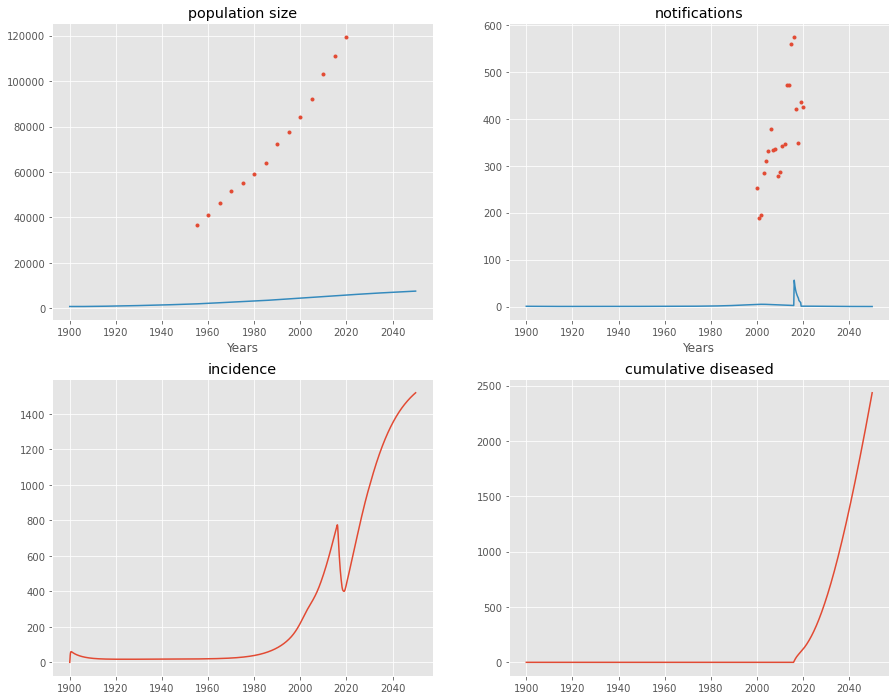

In [12]:
fig = pyplot.figure(figsize=(15, 12))
for i_out, output in enumerate(outputs_to_plot):
    axis = fig.add_subplot(2, 2, i_out + 1)
    if output in out:
        basedf[output].plot(style='.')
    base_outdf[output].plot(label="baseline")
    axis.set_title(output.replace("_", " "))

In [14]:
base_params['age_breakpoints']

[0, 5, 15, 35, 50]

In [15]:
from autumn.core.inputs.social_mixing.queries import get_prem_mixing_matrices

In [23]:
mixing_matrix = get_prem_mixing_matrices('KIR', [0,5,15,35,50], None)

In [25]:
mixing_matrix

{'all_locations': array([[ 4.16115861,  3.46332224,  4.90148211,  2.31376399,  1.24229891],
        [ 1.36031346, 15.78848173,  3.56454631,  2.35349315,  0.79458172],
        [ 0.80774569,  2.59368854, 10.36371287,  2.4676682 ,  1.12902231],
        [ 0.6273105 ,  1.94891766,  3.36413264,  2.86719593,  1.18261286],
        [ 0.44040221,  1.09178963,  1.88045398,  1.44685781,  1.14380505]]),
 'home': array([[0.47252363, 1.54511214, 2.07140533, 0.94144274, 0.47658616],
        [0.45117193, 1.66623193, 1.27143532, 1.06267564, 0.34387363],
        [0.48736103, 0.84595735, 1.34787739, 0.50904416, 0.36206296],
        [0.42271653, 1.44527764, 0.97319603, 0.52008685, 0.25021915],
        [0.37547714, 0.86147335, 0.89511357, 0.4939708 , 0.4367939 ]]),
 'other_locations': array([[3.36674554, 1.86690422, 2.75496974, 1.31189388, 0.74679205],
        [0.88176874, 7.68380107, 2.13784802, 1.20956796, 0.42550772],
        [0.31267409, 1.27867552, 6.40335188, 0.99309627, 0.31541327],
        [0.172233

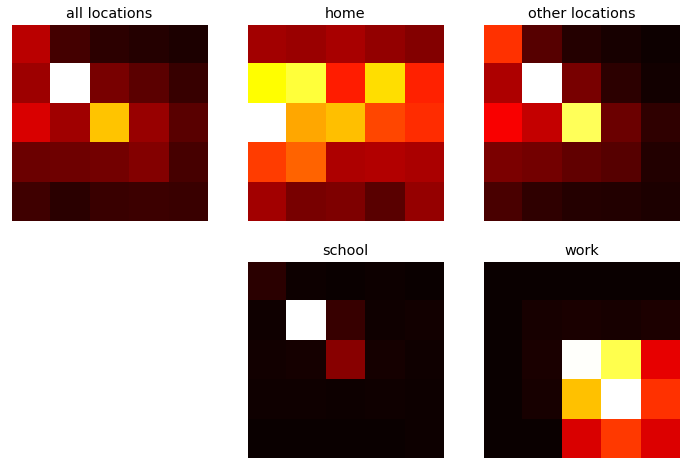

In [29]:
fig = pyplot.figure(figsize=(12, 8))
positions = [1, 2, 3, 5, 6]
for i_loc, location in zip(positions, mixing_matrix.keys()):
    ax = fig.add_subplot(2, 3, i_loc)
    ax.imshow(
        np.flipud(np.transpose(mixing_matrix[location])), 
        cmap=cm.hot, 
        vmin=0,
        vmax=mixing_matrix[location].max(), 
        origin="lower"
    )
    ax.set_title(location.replace("_", " "))
    ax.set_xticks([])
    ax.set_yticks([])
